In [1]:
# !pip install tensorflow_addons

# Splitting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from keras.layers.core.embedding import Embedding

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay, classification_report, f1_score, recall_score, precision_score

C:\Users\Praveen\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
X = np.load(r"C:\Users\Praveen\Desktop\BCI\X_1sec.npy")
y = np.load(r"C:\Users\Praveen\Desktop\BCI\y_1sec.npy")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size= 0.5, random_state= 3)

In [5]:
X_train.shape, X_test.shape, X_val.shape

((949, 101, 4), (204, 101, 4), (204, 101, 4))

In [6]:
y_train.shape, y_test.shape, y_val.shape

((949,), (204,), (204,))

# Model Building

In [7]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape= (X.shape[1], X.shape[2]), activation='relu', return_sequences=True))
lstm.add(LSTM(15, activation='relu', return_sequences=False))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 101, 32)           4736      
                                                                 
 lstm_1 (LSTM)               (None, 15)                2880      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 7,632
Trainable params: 7,632
Non-trainable params: 0
_________________________________________________________________


In [9]:
lstm.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
30/30 [==============================] - 4s 61ms/step - loss: 42.7857 - accuracy: 0.2887 - val_loss: 5.1967 - val_accuracy: 0.3725
Epoch 2/50
30/30 [==============================] - 1s 48ms/step - loss: 7.9947 - accuracy: 0.2993 - val_loss: 2.7583 - val_accuracy: 0.4167
Epoch 3/50
30/30 [==============================] - 1s 48ms/step - loss: 3.1166 - accuracy: 0.3361 - val_loss: 1.4927 - val_accuracy: 0.4363
Epoch 4/50
30/30 [==============================] - 2s 50ms/step - loss: 2.5255 - accuracy: 0.4173 - val_loss: 1.2361 - val_accuracy: 0.4853
Epoch 5/50
30/30 [==============================] - 2s 57ms/step - loss: 1.9688 - accuracy: 0.4721 - val_loss: 1.0430 - val_accuracy: 0.5441
Epoch 6/50
30/30 [==============================] - 2s 72ms/step - loss: 1.9363 - accuracy: 0.5258 - val_loss: 1.1408 - val_accuracy: 0.5931
Epoch 7/50
30/30 [==============================] - 2s 76ms/step - loss: 1.5166 - accuracy: 0.5659 - val_loss: 1.1625 - val_accuracy: 0.5833
Epoch 8/50
3

# Evaluation

In [10]:
class evaluation:
    
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        
    
    def threshold_plot_one(self):
    
        x_axis = np.arange(0.1, 1.1, 0.1)
        recall, precision = [], []

        for thresh in x_axis:
            y_pred = self.model.predict(self.X_test) >= thresh

            recall.append(recall_score(y_pred, self.y_test))
            precision.append(precision_score(y_pred, self.y_test))

        plt.figure(figsize = (16, 5))
        plt.plot(x_axis, recall)
        plt.plot(x_axis, precision)
        plt.show()
    
    def threshold_plot_zero(self):
    
        x_axis = np.arange(0.1, 1.1, 0.1)
        recall, precision = [], []

        for thresh in x_axis:
            y_pred = self.model.predict(self.X_test) < thresh

            recall.append(recall_score(y_pred, self.y_test))
            precision.append(precision_score(y_pred, self.y_test))

        plt.figure(figsize = (16, 5))
        plt.plot(x_axis, recall)
        plt.plot(x_axis, precision)
        plt.show()
        
    def model_performance(self, threshold):
    
        y_pred = self.model.predict(self.X_test) >= threshold

        print('\n')
        print(f'F1 Score: {f1_score(y_pred, self.y_test)}\n')
        print(f'Classification Report:\n{classification_report(y_pred, self.y_test)}\n')
        print(f'Confusion Matrix:\n{pd.DataFrame(confusion_matrix(y_pred, self.y_test))}')

In [11]:
evaluation_test = evaluation(lstm, X_test, y_test)
evaluation_train = evaluation(lstm, X_train, y_train)

7/7 [==============================] - 0s 21ms/step


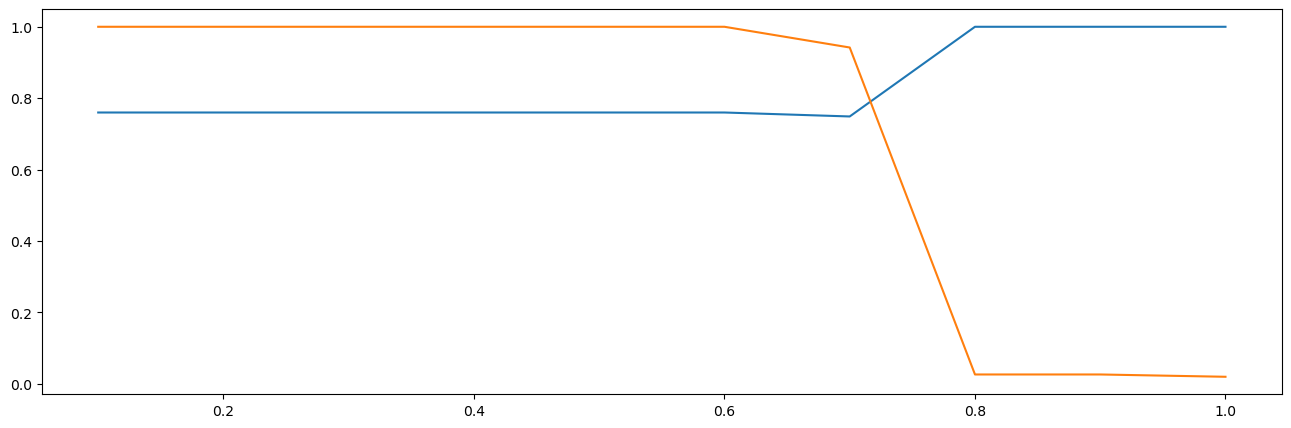

In [12]:
# Test
evaluation_test.threshold_plot_one()

30/30 [==============================] - 1s 23ms/step


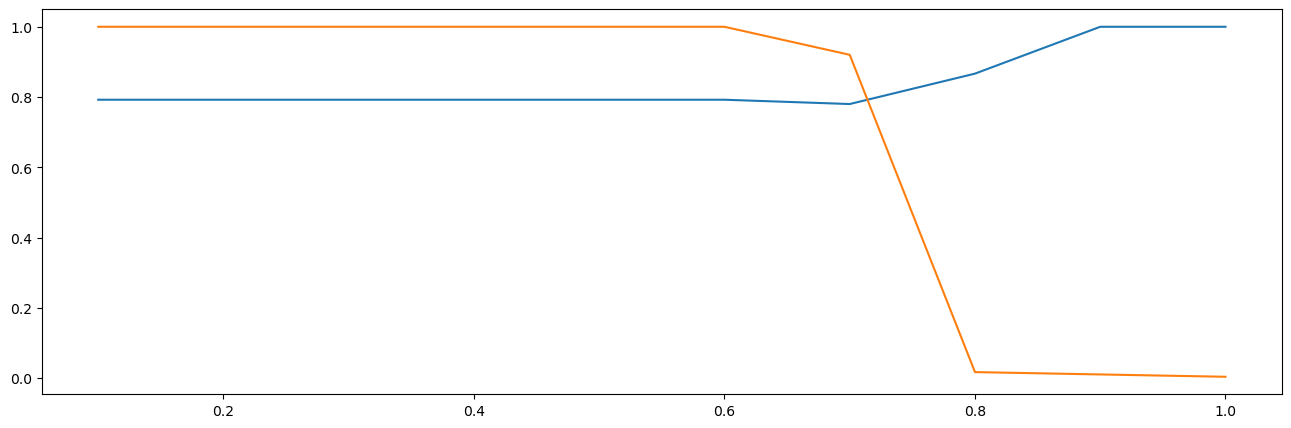

In [13]:
# Train
evaluation_train.threshold_plot_one()

In [18]:
# Test
evaluation_test.model_performance(0.85)

7/7 [==============================] - 0s 26ms/step


F1 Score: 0.05031446540880503

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.24      0.39       200
        True       0.03      1.00      0.05         4

    accuracy                           0.26       204
   macro avg       0.51      0.62      0.22       204
weighted avg       0.98      0.26      0.39       204


Confusion Matrix:
    0    1
0  49  151
1   0    4


In [17]:
# Train
evaluation_train.model_performance(0.85)

30/30 [==============================] - 1s 27ms/step


F1 Score: 0.023622047244094484

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.21      0.35       939
        True       0.01      0.90      0.02        10

    accuracy                           0.22       949
   macro avg       0.50      0.55      0.18       949
weighted avg       0.98      0.22      0.34       949


Confusion Matrix:
     0    1
0  196  743
1    1    9
